## ТИАБД Практическая работа №4

### Задание №1
Определить два вектора, представляющие собой число автомобилей, припаркованных в течении 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже.
1. Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону).
2. Построить диаграмму рассеяния для вышеупомянутых переменных.


Корреляция (NumPy): -0.9999999999999998


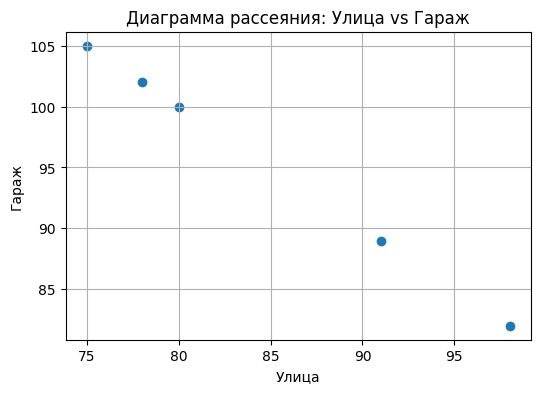

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

correlation = np.corrcoef(street, garage)[0, 1]
print("Корреляция (NumPy):", correlation)

plt.figure(figsize=(6, 4))
plt.scatter(street, garage)
plt.title('Диаграмма рассеяния: Улица vs Гараж')
plt.xlabel('Улица')
plt.ylabel('Гараж')
plt.grid()
plt.show()

In [ ]:
x = np.array([80, 98, 75, 91, 78])
y = np.array([100, 82, 105, 89, 102])
n = len(x)

sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)
sum_y2 = np.sum(y**2)

r = (n * sum_xy - sum_x * sum_y) / np.sqrt((n * sum_x2 - sum_x**2) * (n * sum_y2 - sum_y**2))
print("Корреляция по Пирсону (r) = {", r,"}")

Корреляция по Пирсону (r) = { -1.0 }


### Задание № 2
Найти и выгрузить данные. Вывести, провести предобработку и описать признаки.
1. Построить корреляционную матрицу по одной целевой переменной. Определить наиболее коррелирующую переменную, продолжить с ней работу в следующем пункте.
2. Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE.
3. Визуализировать регрессию на графике.
.


In [ ]:
import pandas as pd


data = pd.read_csv('insurance.csv')
print(data.describe())
print()
print(data.info())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: flo

In [ ]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
prepared_data = data.copy(deep=True)

prepared_data['sex'] = prepared_data['sex'].map({'male': 0, 'female': 1})
prepared_data['smoker'] = prepared_data['smoker'].map({'no': 0, 'yes': 1})
prepared_data['region'] = prepared_data['region'].map({
    'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

print(prepared_data.head())

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       0  16884.92400
1   18    0  33.770         1       0       1   1725.55230
2   28    0  33.000         3       0       1   4449.46200
3   33    0  22.705         0       0       2  21984.47061
4   32    0  28.880         0       0       2   3866.85520


In [ ]:
corr_matrix = prepared_data.corr().age.to_frame()
corr_matrix.style.background_gradient(cmap='coolwarm')

,age
age,1.000000
sex,0.020856
bmi,0.109272
children,0.042469
smoker,-0.025019
region,-0.002127
charges,0.299008


Наклон: 257.7226186668955
Сдвиг: 3165.885006063025
Среднеквадратичное отклонение:  133440978.61376347


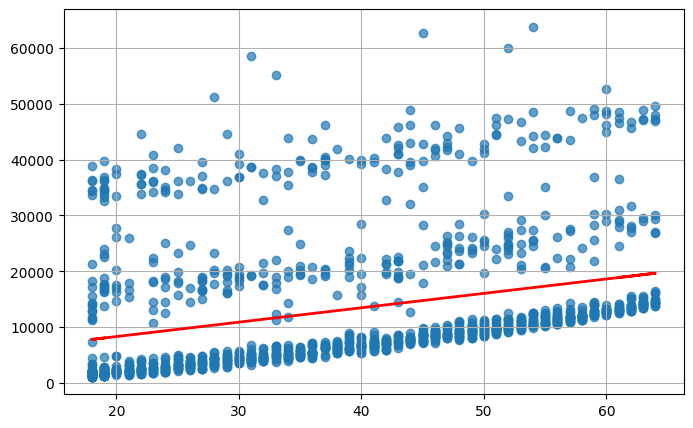

In [ ]:
import matplotlib.pyplot as plt


X = prepared_data['age'].values.flatten()
y = prepared_data['charges'].values.flatten()

x_mean = np.mean(x)
y_mean = np.mean(y)

num = np.sum((x - x_mean) * (y - y_mean))
dom = np.sum((x - x_mean) ** 2)

slope = num / dom

intercept = y_mean - slope * x_mean

y_pred = slope * x + intercept

mse = np.mean((y - y_pred) ** 2)

print(f"Наклон: {slope}\nСдвиг: {intercept}")
print('Среднеквадратичное отклонение: ', mse)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.7)
plt.plot(X, y_pred, linewidth=2, color='r')
plt.grid()
plt.show()

### Задание № 3
Загрузить данные: 'insurance.csv'. Вывести и провести предобработку. Вывести список уникальных регионов.
1. Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя первый способ, через библиотеку Scipy.
2. Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя второй способ, с помощью функции anova_lm() из библиотеки statsmodels.
3. С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони. Сделать выводы.
4. Выполнить пост-хок тесты Тьюки и построить график.
5. Выполнить двухфакторный ANOVA тест, чтобы проверить влияние региона и пола на индекс массы тела (BMI), используя функцию anova_lm() из библиотеки statsmodels.
6. Выполнить пост-хок тесты Тьюки и построить график.


In [ ]:
import scipy.stats as stats


groupped_data_by_regions = [group['bmi'].values for _, group in data.groupby('region')]
anova_result = stats.f_oneway(*groupped_data_by_regions)
print("Результаты однофакторного ANOVA теста (SciPy):")
print("\tF-значение: ", anova_result.statistic)
print("\tP-значение: ", anova_result.pvalue)

Результаты однофакторного ANOVA теста (SciPy):
	F-значение:  39.49505720170283
	P-значение:  1.881838913929143e-24


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('bmi ~ region', data = data).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN


In [ ]:
region_pairs = []
regions = data['region'].unique()

for reg1 in range(3):
    for reg2 in range(reg1 + 1, 4):
        region_pairs.append((regions[reg1], regions[reg2]))

alpha = 0.05 / len(region_pairs)

for reg1, reg2 in region_pairs:
    print(reg1, reg2)
    group1 = data[data['region'] == reg1]['bmi']
    group2 = data[data['region'] == reg2]['bmi']
    t_test = stats.ttest_ind(group1, group2)
    print(f"\tСтатистика: {t_test.statistic:.10f}")
    print(f"\tP-значение: {t_test.pvalue:.10f}")
    if t_test.pvalue >= alpha:
        print("\tГипотеза принимается")
    else:
        print("\tГипотеза отклоняется")


southwest southeast
	Статистика: -5.9083738215
	P-значение: 0.0000000054
	Гипотеза отклоняется
southwest northwest
	Статистика: 3.2844171500
	P-значение: 0.0010769585
	Гипотеза отклоняется
southwest northeast
	Статистика: 3.1169000930
	P-значение: 0.0019086162
	Гипотеза отклоняется
southeast northwest
	Статистика: 9.2564901355
	P-значение: 0.0000000000
	Гипотеза отклоняется
southeast northeast
	Статистика: 8.7909055626
	P-значение: 0.0000000000
	Гипотеза отклоняется
northwest northeast
	Статистика: 0.0603077272
	P-значение: 0.9519291708
	Гипотеза принимается


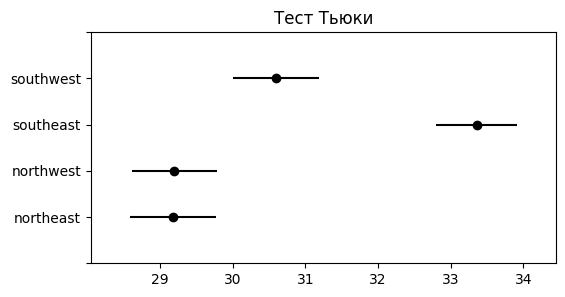

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=data['bmi'], groups=data['region'], alpha=0.05)
tukey.plot_simultaneous(figsize=(6, 3))
plt.title('Тест Тьюки')
plt.show()

In [ ]:
model_two_way = ols('bmi ~ region + sex', data=data).fit()
anova_result_two_way = sm.stats.anova_lm(model_two_way, typ=2)
print(anova_result_two_way)

                sum_sq      df          F        PR(>F)
region     4034.975135     3.0  39.336119  2.342323e-24
sex          86.007035     1.0   2.515393  1.129767e-01
Residual  45578.312720  1333.0        NaN           NaN


          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
northeast female   northeast male  -0.2998 0.9998 -2.2706  1.6711  False
northeast female northwest female  -0.0464    1.0 -2.0142  1.9215  False
northeast female   northwest male  -0.2042    1.0 -2.1811  1.7728  False
northeast female southeast female   3.3469    0.0    1.41  5.2839   True
northeast female   southeast male   4.6657    0.0  2.7634   6.568   True
northeast female southwest female   0.7362 0.9497 -1.2377    2.71  False
northeast female   southwest male   1.8051 0.1007 -0.1657   3.776  False
  northeast male northwest female   0.2534 0.9999 -1.7083  2.2152  False
  northeast male   northwest male   0.0956    1.0 -1.8752  2.0665  False
  northeast male southeast female   3.6467    0.0  1.7159  5.5775   True
  northeast male   southeast male   4.9655    0.0  

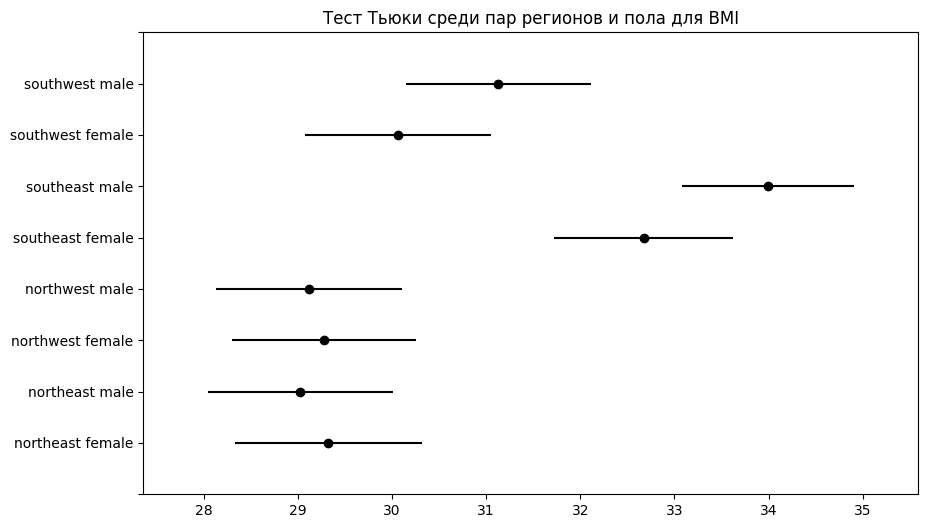

In [ ]:
tukey_result_two_way = pairwise_tukeyhsd(
    endog=data['bmi'],
    groups=data[['region', 'sex']].apply(
        lambda x: ' '.join(x),
        axis=1),
    alpha=0.05)
print(tukey_result_two_way)


tukey_result_two_way.plot_simultaneous()
plt.title('Тест Тьюки среди пар регионов и пола для BMI')
plt.show()